In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# from fbprophet import Prophet

In [131]:
from prophet import Prophet

In [132]:
# importing dataset
df = pd.read_csv("Time_series_analysis_and_forecast_DATASET.csv")

In [134]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [135]:
#summmary of number of rows and columns
df.shape

(92016, 5)

In [136]:
#summary of the entire dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [137]:
#Finding missing values
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [138]:
#statistical description of data
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [139]:
#converting the fulldate column to pandas datetime and resampling to days
df['FullDate'] = pd.to_datetime(df['FullDate'])
df = df.set_index('FullDate')
df_days = df.resample('D').sum()

In [140]:
df_days.reset_index(inplace=True)

x_train = df_days[:-2757]
x_test = df_days.tail(2757)

df_days.dtypes

FullDate     datetime64[ns]
Tmax                float64
SysLoad             float64
GasPrice            float64
ElecPrice           float64
dtype: object

In [141]:
# Preparing the data for univariate analysis
univariante_df = df_days[['FullDate','ElecPrice']]

#creating a new dataframe from df_days by renaming the columns
df_1 = univariante_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})

In [142]:
x_train_df_1 = df_1[:-2757]
x_test_df_1 = df_1.tail(2757)

In [143]:
x_train_df_1.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [144]:
# building the model
model = Prophet()

In [145]:
# fitting the model
model.fit(x_train_df_1)

14:01:15 - cmdstanpy - INFO - Chain [1] start processing
14:01:16 - cmdstanpy - INFO - Chain [1] done processing


In [146]:
# predicting test data
forecast = model.make_future_dataframe(periods=2757 , freq= 'D' )
prediction = model.predict(forecast)

In [147]:
prediction.shape

(3834, 19)

In [148]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,829.331399,-1218.272819,3379.270067,829.331399,829.331399,157.599716,157.599716,157.599716,10.621227,10.621227,10.621227,146.978489,146.978489,146.978489,0.0,0.0,0.0,986.931114
1,2010-09-02,829.250215,-1556.149390,3136.427612,829.250215,829.250215,59.488620,59.488620,59.488620,-88.251662,-88.251662,-88.251662,147.740282,147.740282,147.740282,0.0,0.0,0.0,888.738835
2,2010-09-03,829.169032,-1427.284162,3213.324473,829.169032,829.169032,166.607278,166.607278,166.607278,19.685963,19.685963,19.685963,146.921315,146.921315,146.921315,0.0,0.0,0.0,995.776310
3,2010-09-04,829.087848,-1515.496265,3188.730984,829.087848,829.087848,-29.894191,-29.894191,-29.894191,-174.245541,-174.245541,-174.245541,144.351350,144.351350,144.351350,0.0,0.0,0.0,799.193657
4,2010-09-05,829.006664,-1605.544927,2990.959174,829.006664,829.006664,-95.838943,-95.838943,-95.838943,-235.732406,-235.732406,-235.732406,139.893463,139.893463,139.893463,0.0,0.0,0.0,733.167721


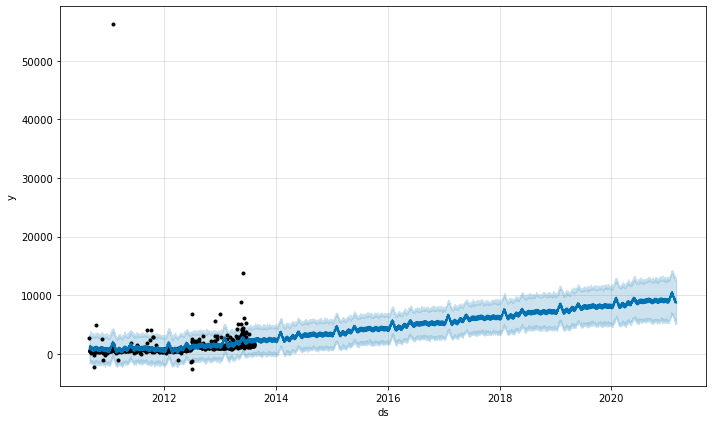

In [149]:
model.plot(prediction)
plt.show()

In [150]:
def mean_absolute_percentage_error(y_actual, y_pred): 
    y_actual, y_pred = np.array(y_actual), np.array(y_pred)
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

In [193]:
# MAPE Value

round(mean_absolute_percentage_error(x_test_df_1['y'], prediction['yhat_lower'][-2757:]),2)

442.2

In [152]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [187]:
# RMSE
rmse = sqrt(mean_squared_error(x_test_df_1['y'], prediction['yhat'][-2757:]))
print(round(rmse, 2))

5054.92


In [154]:
# import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize']= 15,8

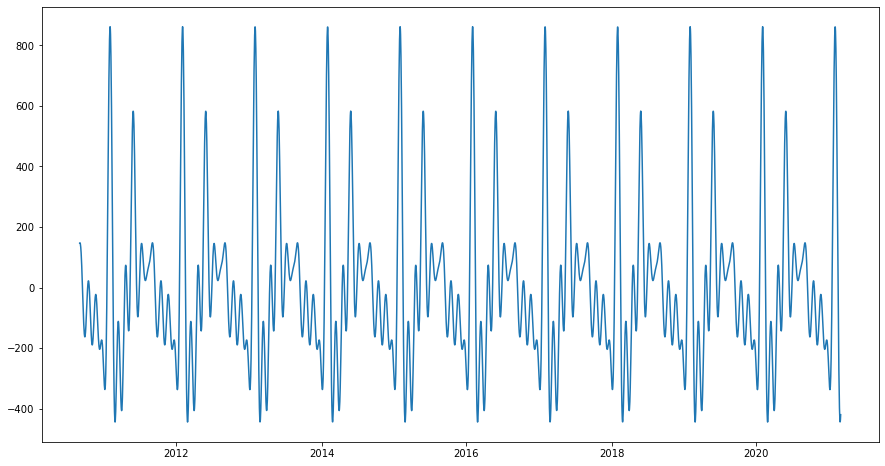

In [155]:
plt.plot(prediction['ds'],prediction['yearly'])
plt.show()

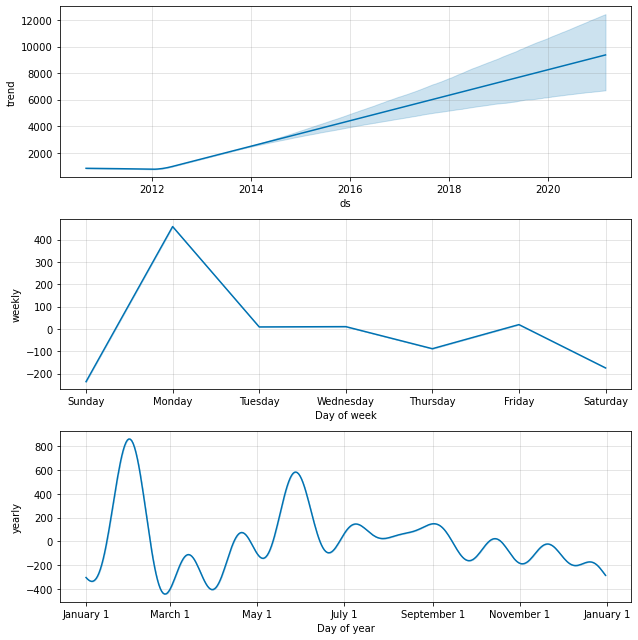

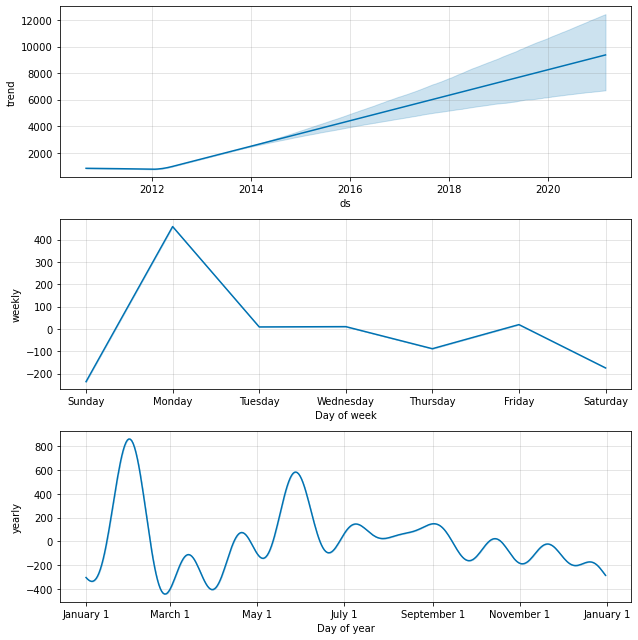

In [156]:
model.plot_components(prediction)

In [157]:
df_2 = df_days.copy()

multivariante_df = df_2.rename(columns={"FullDate": "ds", "ElecPrice": "y","SysLoad": "add1","Tmax": "add2","GasPrice": "add3"})


In [158]:
multivariante_df.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [159]:
multivariante_x_train = multivariante_df[:-2757]
multivariante_x_test = multivariante_df.tail(2757)

In [160]:
multivariante_x_train

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
1072,2013-08-08,405.6,29971.31350,120.1320,1681.620
1073,2013-08-09,408.0,12680.97915,141.3312,1343.705
1074,2013-08-10,429.6,28200.28725,121.3200,1650.610
1075,2013-08-11,487.2,20641.99090,119.0400,1620.955


In [161]:
multivariante_model = Prophet()
multivariante_model.add_regressor('add1')
multivariante_model.add_regressor('add2')
multivariante_model.add_regressor('add3')

In [162]:
multivariante_model.fit(multivariante_x_train)

14:01:27 - cmdstanpy - INFO - Chain [1] start processing
14:01:29 - cmdstanpy - INFO - Chain [1] done processing


In [163]:
predictions = multivariante_model.make_future_dataframe(periods=2757, freq='D')
predictions['add1'] = multivariante_df['add1'].values
predictions['add2'] = multivariante_df['add2'].values
predictions['add3'] = multivariante_df['add3'].values

In [164]:
predictions.shape

(3834, 4)

In [165]:
predictions.head()

,ds,add1,add2,add3
0,2010-09-01,41565.380,379.2,88.56
1,2010-09-02,38898.990,369.6,88.56
2,2010-09-03,41665.760,439.2,106.80
3,2010-09-04,35638.085,328.8,81.36
4,2010-09-05,35611.410,357.6,106.80


In [166]:
forecast= multivariante_model.predict(predictions)

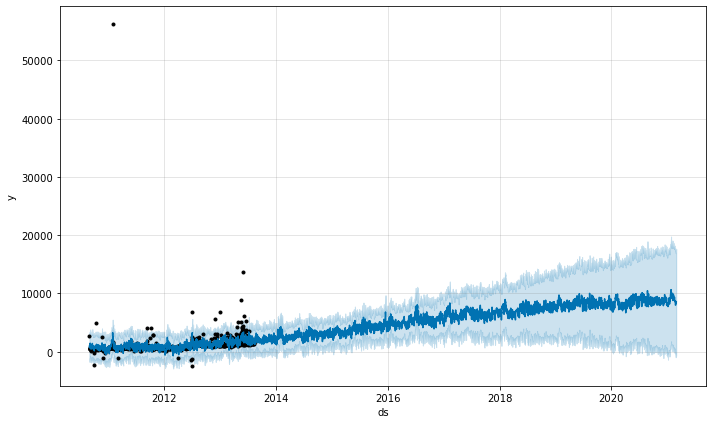

In [167]:
multivariante_model.plot(forecast)
plt.show()

In [189]:
round(mean_absolute_percentage_error(multivariante_x_test['y'][-2757:], forecast['yhat'][-2757:]), 2)


770.71

In [175]:
multivariante_rmse = sqrt(mean_squared_error(multivariante_x_test['y'][-2757:], forecast['yhat'][-2757:]))
print(round(multivariante_rmse), 2)

5128 2


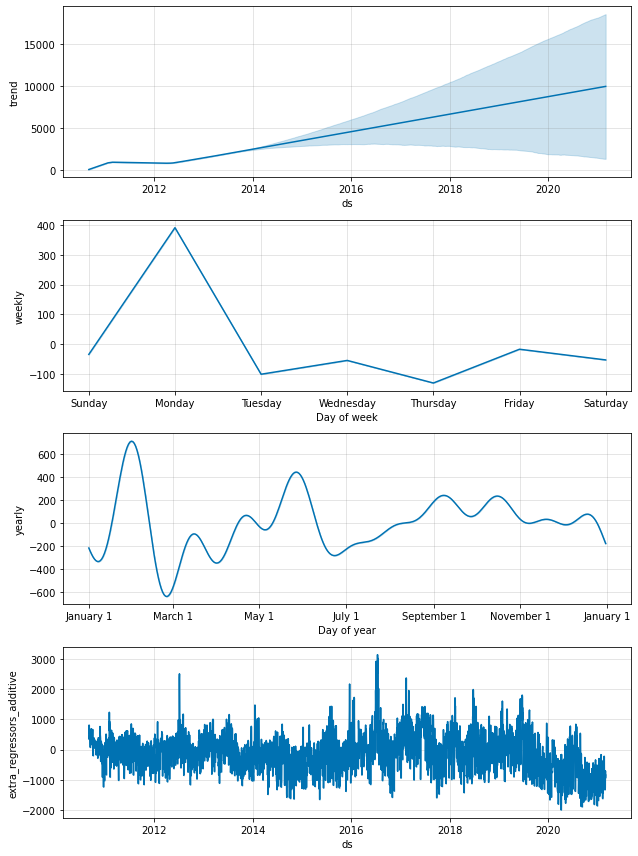

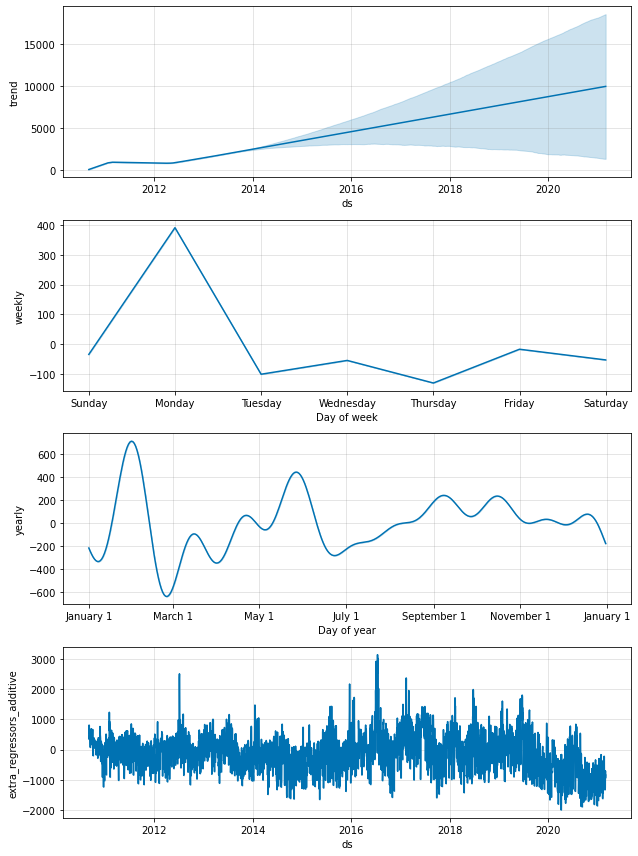

In [170]:
multivariante_model.plot_components(forecast)

In [171]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [172]:
import statsmodels.api as sm
from pylab import rcParams 

In [173]:
from statsmodels.tsa.stattools import adfuller

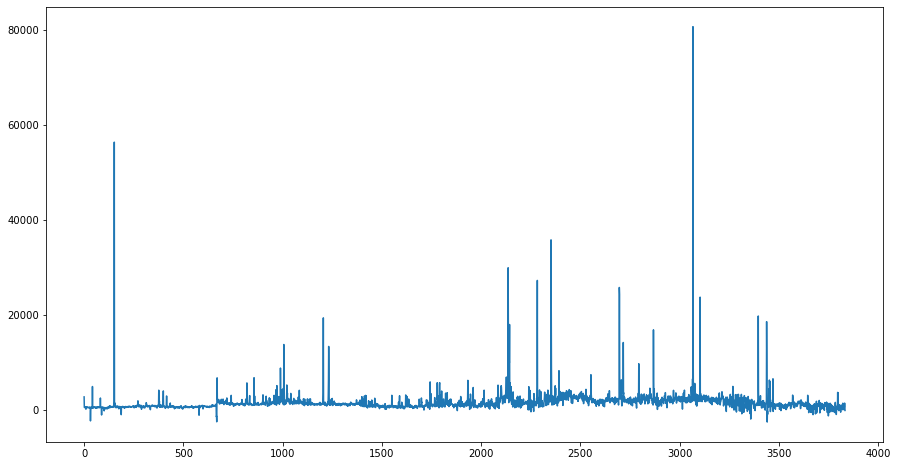

In [176]:
plt.plot(df_days.index,df_days.ElecPrice)

In [180]:
adf_result = adfuller(df_days[['SysLoad','GasPrice']])
print(f'ADF Statistic: {adf_result}') 
print(f'p-value: {adf_result}') 

ValueError: x is required to have ndim 1 but has ndim 2